# EMAIL SPAM DETECTION WITH MACHINE LEARNING

# DATASET
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

Dataset : https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

# IMPORT LIBRARIES

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import classification_report

In [53]:
# Load the dataset with the specified encoding
file_path = "C:/Users/JEBINA P/Downloads/email_spam.csv"

try:
    df = pd.read_csv(file_path, encoding="ISO-8859-1")

    # Display the first few rows of the dataset
    print(df.head())
except FileNotFoundError:
    print(f"File '{file_path}' not found. Please check the file path.")
except UnicodeDecodeError:
    print(f"Unable to decode the file with the specified encoding. Try a different encoding.")


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [54]:
# Drop unnecessary columns from the DataFrame
column_to_remove = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df = df.drop(column_to_remove, axis=1)

In [55]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [56]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [58]:
df.shape

(5572, 2)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [60]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [61]:
df[df.duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [62]:
df = df.drop_duplicates()
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [63]:
df["v1"].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

# VISUALIZATION

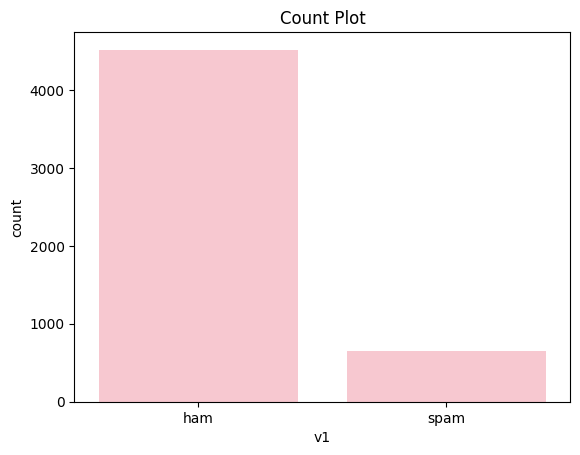

In [64]:
# Create a countplot with a specific color
sns.countplot(data=df, x='v1', color='pink')  # You can change 'blue' to any color you prefer
plt.xlabel('v1')
plt.ylabel('count')
plt.title('Count Plot')
plt.show()

In [65]:
# Convert the "Category" column values to numerical representation (0 for "spam" and 1 for "ham")

df.loc[df["v1"] == "spam", "Category"] = 0
df.loc[df["v1"] == "ham", "Category"] = 1

df.head()

C:\Users\JEBINA P\AppData\Local\Temp\ipykernel_14612\521347544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["v1"] == "spam", "Category"] = 0


,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0


In [66]:
# Separate the feature (v2) and target (category) data
X=df['v2']
y=df['Category']

In [67]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

In [68]:
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5567    0.0
5568    1.0
5569    1.0
5570    1.0
5571    1.0
Name: Category, Length: 5169, dtype: float64

In [69]:
#Split Data to Train and Test Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [70]:
#Create a TF-IDF vectorizer to convert text messages into numerical feature
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier with a specified number of neighbors (e.g., 5)
knn_model = KNeighborsClassifier(n_neighbors=5)


In [72]:
# Train the KNN model on the training data
knn_model.fit(X_train_features, y_train)

KNeighborsClassifier()

In [73]:
# Model Evaluation
# Predictions on the training data
knn_train_predictions = knn_model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, knn_train_predictions)

In [74]:
# Predictions on the test data
knn_test_predictions = knn_model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, knn_test_predictions)

# Print accuracy
print('Accuracy on training data: {:.2f}%'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {:.2f}%'.format(accuracy_on_test_data * 100))

Accuracy on training data: 91.66%
Accuracy on test data: 89.94%


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree Classifier
model = DecisionTreeClassifier()

In [76]:
# Fit the model on the training data
model.fit(X_train_features, y_train)

DecisionTreeClassifier()

In [77]:
# Model evaluation on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [78]:
# Model evaluation on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {:.2f}%'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {:.2f}%'.format(accuracy_on_test_data * 100))

Accuracy on training data: 100.00%
Accuracy on test data: 96.03%


In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score on test data
precision = precision_score(y_test, prediction_on_test_data)
recall = recall_score(y_test, prediction_on_test_data)
f1 = f1_score(y_test, prediction_on_test_data)

print('Precision on test data: {:.2f}'.format(precision))
print('Recall on test data: {:.2f}'.format(recall))
print('F1-score on test data: {:.2f}'.format(f1))

Precision on test data: 0.98
Recall on test data: 0.98
F1-score on test data: 0.98


# CONFUSION MATRIX

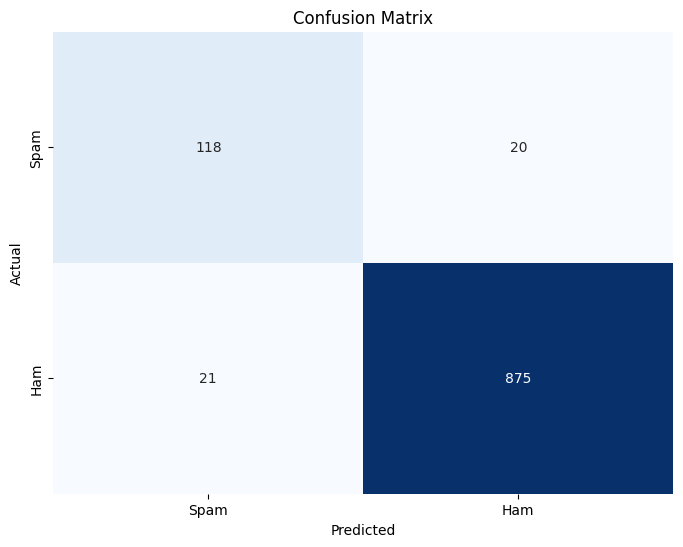

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, prediction_on_test_data)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [81]:
# Classification report
classification_rep = classification_report(y_test, prediction_on_test_data,target_names=['Spam', 'Ham'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

        Spam       0.85      0.86      0.85       138
         Ham       0.98      0.98      0.98       896

    accuracy                           0.96      1034
   macro avg       0.91      0.92      0.91      1034
weighted avg       0.96      0.96      0.96      1034



In [82]:
# Metrics calculation
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)

Accuracy :  0.960348162475822
Precision :  0.9776536312849162
Recall :  0.9765625
Specificity :  0.855072463768116
